In [64]:
from fbprophet import Prophet
import pandas as pd
import pylab

In [121]:
###################### Covid-19 -Polska #############################

df = pd.read_csv('Covid_polska.csv',sep=';',engine='python')
df.head()

train_data = df[['Data','Wszystkie przypadki kumulatywnie']]
train_data=train_data.rename(columns={"Data": "ds", "Wszystkie przypadki kumulatywnie": "y"})

In [128]:
m = Prophet(weekly_seasonality=True,daily_seasonality=True) # wymuszone parametry okresowości tygodniowy i roczny gdyż dane nie przekraczają okresu roku
m.fit(train_data)

future = m.make_future_dataframe(periods=300)
future.head()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
0,2020-01-04
1,2020-01-05
2,2020-01-06
3,2020-01-07
4,2020-01-08


In [129]:
future.tail()

,ds
561,2021-10-03
562,2021-10-04
563,2021-10-05
564,2021-10-06
565,2021-10-07


In [11]:
i = 0
for element in train_data['ds']:

    train_data['ds'][i] =  train_data['ds'][i][0:]
    i +=1

/home/wojrog/anaconda3/envs/prophet/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ds
261,2021-04-15
262,2021-04-16
263,2021-04-17
264,2021-04-18
265,2021-04-19


In [130]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
561,2021-10-03,752529.273374,534660.380685,946792.826237
562,2021-10-04,755189.396406,548129.576402,948722.134119
563,2021-10-05,748292.319289,531122.943490,953419.749895
564,2021-10-06,753553.817414,550289.046574,969103.312156
565,2021-10-07,742534.016993,527684.761231,957492.386371


In [134]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-04,-1090.933464,-197532.440848,210286.482091,-1090.933464,-1090.933464,4767.229760,4767.229760,4767.229760,-14626.43636,-14626.43636,-14626.43636,19393.666121,19393.666121,19393.666121,0.0,0.0,0.0,3676.296296
1,2020-01-05,-613.585672,-209655.409273,187257.248303,-613.585672,-613.585672,-15528.553680,-15528.553680,-15528.553680,-14626.43636,-14626.43636,-14626.43636,-902.117320,-902.117320,-902.117320,0.0,0.0,0.0,-16142.139352
2,2020-01-06,-136.237881,-226860.714252,197231.794406,-136.237881,-136.237881,-14438.963845,-14438.963845,-14438.963845,-14626.43636,-14626.43636,-14626.43636,187.472515,187.472515,187.472515,0.0,0.0,0.0,-14575.201726
3,2020-01-07,341.109911,-224088.748990,162004.753660,341.109911,341.109911,-22906.574160,-22906.574160,-22906.574160,-14626.43636,-14626.43636,-14626.43636,-8280.137800,-8280.137800,-8280.137800,0.0,0.0,0.0,-22565.464249
4,2020-01-08,818.457703,-214007.398834,190117.675078,818.457703,818.457703,-19215.609233,-19215.609233,-19215.609233,-14626.43636,-14626.43636,-14626.43636,-4589.172873,-4589.172873,-4589.172873,0.0,0.0,0.0,-18397.151530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2021-10-03,768057.827054,534660.380685,946792.826237,706428.898651,831991.530436,-15528.553680,-15528.553680,-15528.553680,-14626.43636,-14626.43636,-14626.43636,-902.117320,-902.117320,-902.117320,0.0,0.0,0.0,752529.273374
562,2021-10-04,769628.360251,548129.576402,948722.134119,707807.855730,833698.765987,-14438.963845,-14438.963845,-14438.963845,-14626.43636,-14626.43636,-14626.43636,187.472515,187.472515,187.472515,0.0,0.0,0.0,755189.396406
563,2021-10-05,771198.893449,531122.943490,953419.749895,709186.812809,835286.386328,-22906.574160,-22906.574160,-22906.574160,-14626.43636,-14626.43636,-14626.43636,-8280.137800,-8280.137800,-8280.137800,0.0,0.0,0.0,748292.319289
564,2021-10-06,772769.426647,550289.046574,969103.312156,710565.769888,837049.263604,-19215.609233,-19215.609233,-19215.609233,-14626.43636,-14626.43636,-14626.43636,-4589.172873,-4589.172873,-4589.172873,0.0,0.0,0.0,753553.817414


<AxesSubplot:xlabel='ds'>

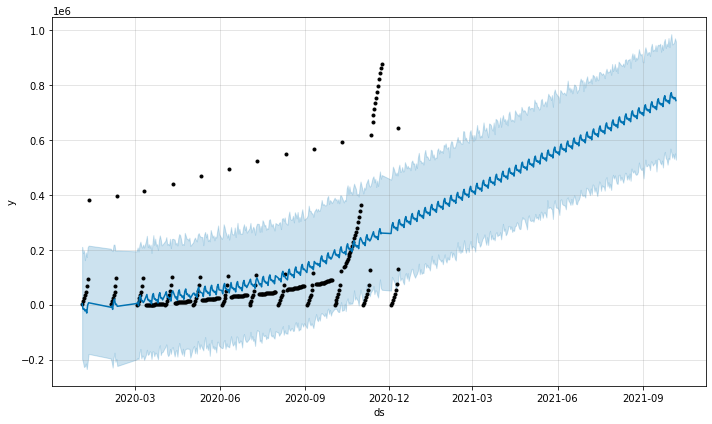

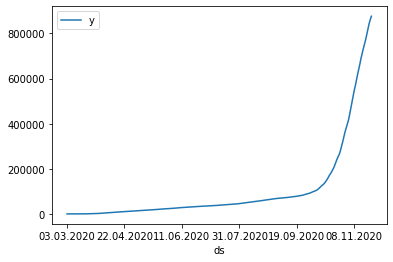

In [131]:
fig1 = m.plot(forecast)
#train_data = train_data.cumsum()
train_data.plot(x="ds", y="y")

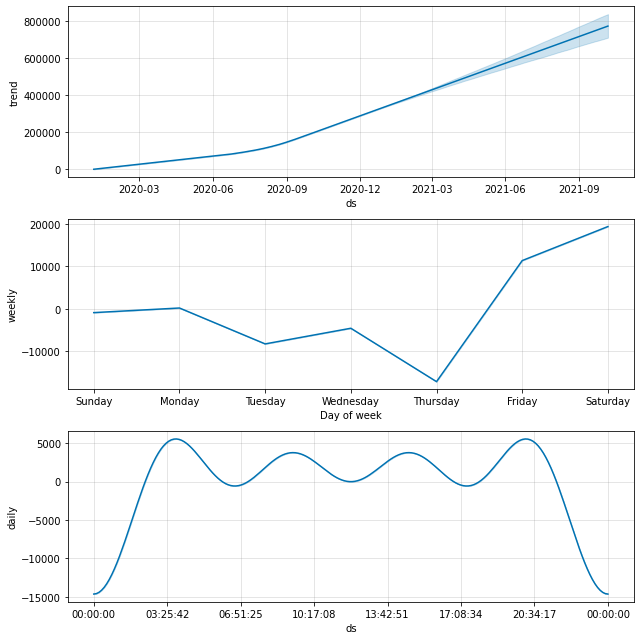

In [132]:
fig2 = m.plot_components(forecast)


In [139]:
###################### Peyton Manning website visits ##################
df_PM = pd.read_csv('example_wp_log_peyton_manning.csv')
df_PM.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [140]:
m_PM = Prophet(daily_seasonality=True)
m_PM.fit(df_PM)

future_PM = m_PM.make_future_dataframe(periods=300)
future_PM.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


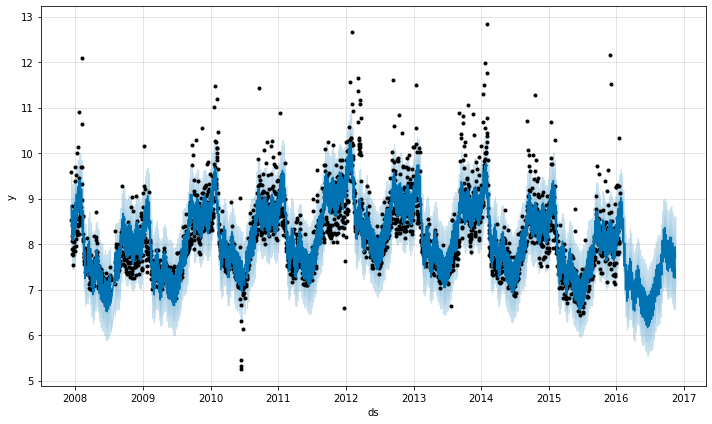

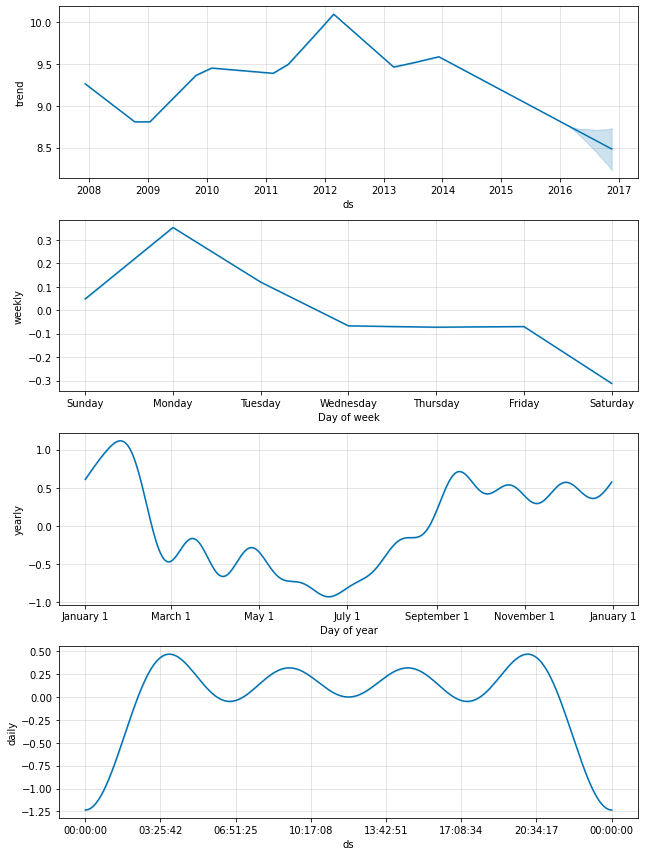

In [141]:
forecast_PM = m_PM.predict(future_PM)

fig1 = m_PM.plot(forecast_PM)
fig2 = m_PM.plot_components(forecast_PM)


In [143]:
len(forecast_PM) 

3205

In [ ]:
############################### Electricity usag time series data ######################################

<AxesSubplot:>

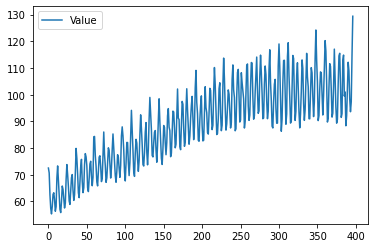

In [144]:
df_ts = pd.read_csv('archive.zip', compression='zip', header=0, sep=',', quotechar='"')
df_ts.head()
df_ts.plot()

In [148]:
len(df_ts)

397

In [150]:
df_ts=df_ts.rename(columns={"DATE": "ds", "Value": "y"}).dropna()
print("Len of ds:", len(df_ts))
el = Prophet()
el.fit(df_ts)

Len of ds: 397
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds
0 1985-01-01
1 1985-02-01
2 1985-03-01
3 1985-04-01
4 1985-05-01
Forecast head :           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1985-01-01  61.336964   70.363874   78.120664    61.336964    61.336964   
1 1985-02-01  61.521021   62.764384   70.383135    61.521021    61.521021   
2 1985-03-01  61.687267   57.210977   64.889027    61.687267    61.687267   
3 1985-04-01  61.871324   49.252835   56.470310    61.871324    61.871324   
4 1985-05-01  62.049444   49.392874   56.591502    62.049444    62.049444   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       12.805734             12.805734             12.805734 -0.254876   
1        4.974338              4.974338              4.974338  0.360063   
2       -0.556185             -0.556185             -0.556185  0.360063   
3       -9.025610             -9.025610             -9.025610  0.529240   
4       -9.077773             -9.077773             -9.077773  0.232

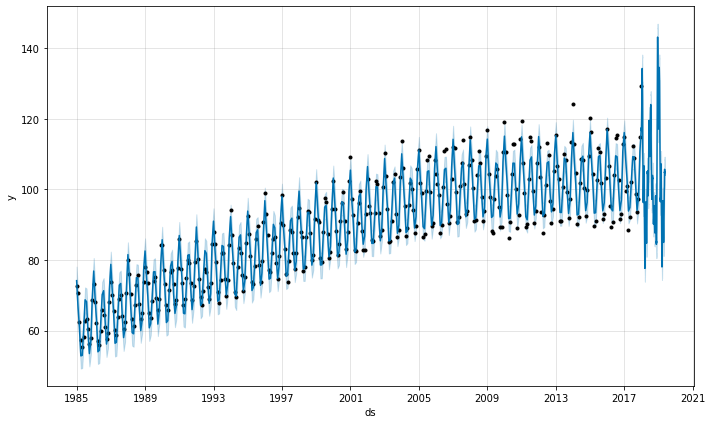

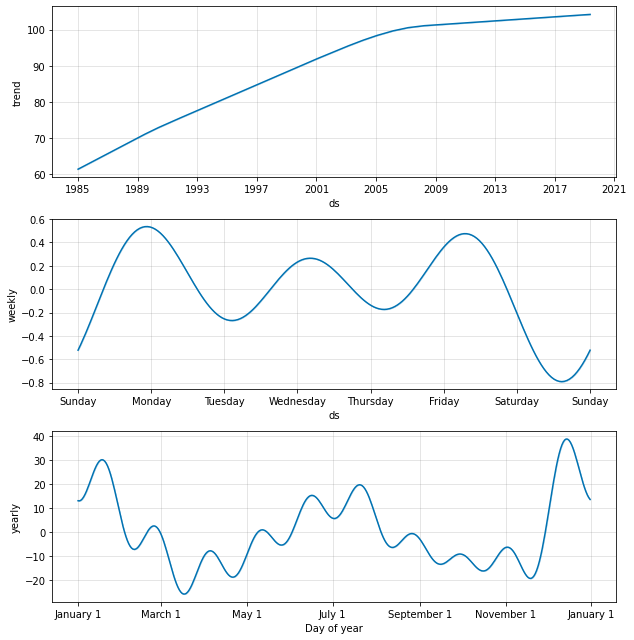

In [160]:
future_el = el.make_future_dataframe(periods=500)
print(future_el.head())

forecast_el = el.predict(future_el)
print("Forecast head :",forecast_el.head())

figel = el.plot(forecast_el)
figel2 = el.plot_components(forecast_el)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


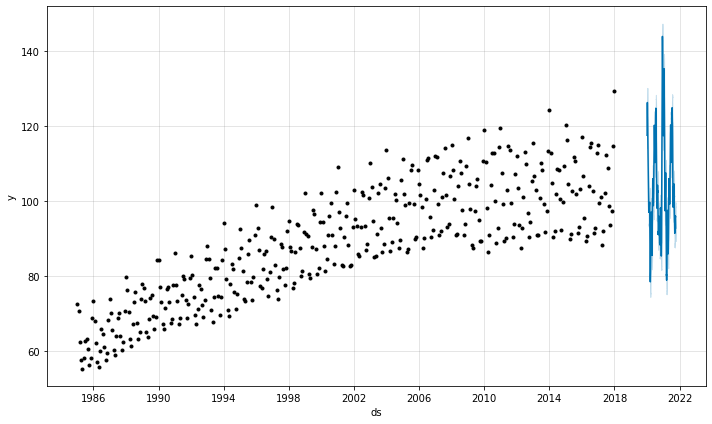

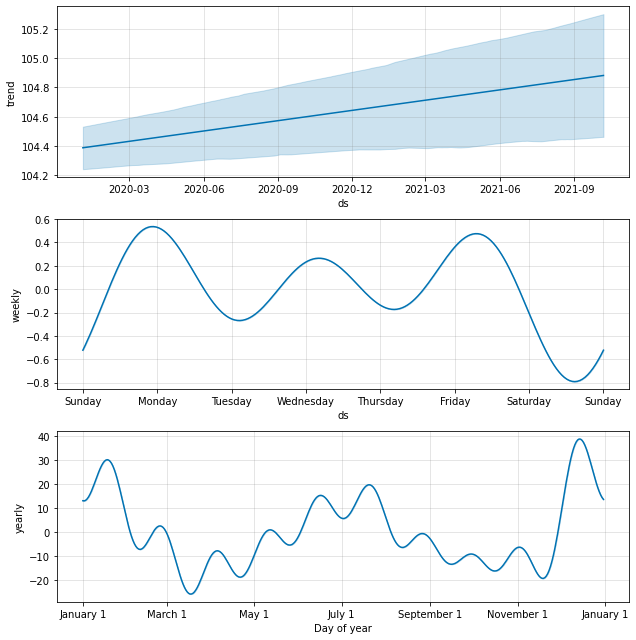

In [158]:
################# Adding weekly seasonality ############################# 
el = Prophet(weekly_seasonality=True)
el.fit(df_ts)

future_el = el.make_future_dataframe(periods=500)
future_el.tail()

forecast_el = el.predict(future_el)
#forecast_el[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


figel = el.plot(forecast_el)
figel = el.plot_components(forecast_el)
